In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
train = pd.read_csv('train.csv')
#sample_predictions = pd.read_csv('./sample_predictions.csv')

In [93]:
train.describe()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,...,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.509455,6.498840e+05,1.265895e+04,5952.453273,2.666032e+03,1032.371839,6.011873,1.109924,9.090730,5267.768000,...,12738.259818,5903.148364,2.554598e+03,997.149954,6.099658,1.106236,9.505821,5254.933636,85.024196,3745.175480
std,0.499956,2.028787e+06,4.900867e+04,17339.141191,2.916543e+04,10954.953223,9.519797,1.910104,18.311060,28946.777345,...,50054.520874,16298.462018,2.508873e+04,9342.006880,9.729557,1.939914,19.424680,26778.820125,106.689384,5518.399590
min,0.000000,1.600000e+01,0.000000e+00,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,...,0.000000,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000
25%,0.000000,2.663750e+03,3.220000e+02,85.000000,3.453649e+00,0.716816,0.359534,0.100503,0.632440,12.000000,...,322.000000,75.000000,3.260473e+00,0.714556,0.356943,0.100503,0.822584,11.000000,15.176568,1206.500000
50%,1.000000,4.558900e+04,7.780000e+02,932.000000,4.876542e+01,14.029113,2.299666,0.341936,3.555194,195.000000,...,773.000000,890.000000,4.876542e+01,14.029113,2.251398,0.341936,3.342999,190.000000,54.925234,2206.420734
75%,1.000000,3.927380e+05,2.838000e+03,6734.000000,3.498196e+02,118.704407,7.198330,1.320681,10.691878,1323.000000,...,2838.000000,6734.000000,3.743699e+02,107.081021,6.866840,1.320681,10.600502,1323.000000,112.191489,4349.908608
max,1.000000,3.654319e+07,1.165830e+06,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,...,664324.000000,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1861.583333,75526.083333


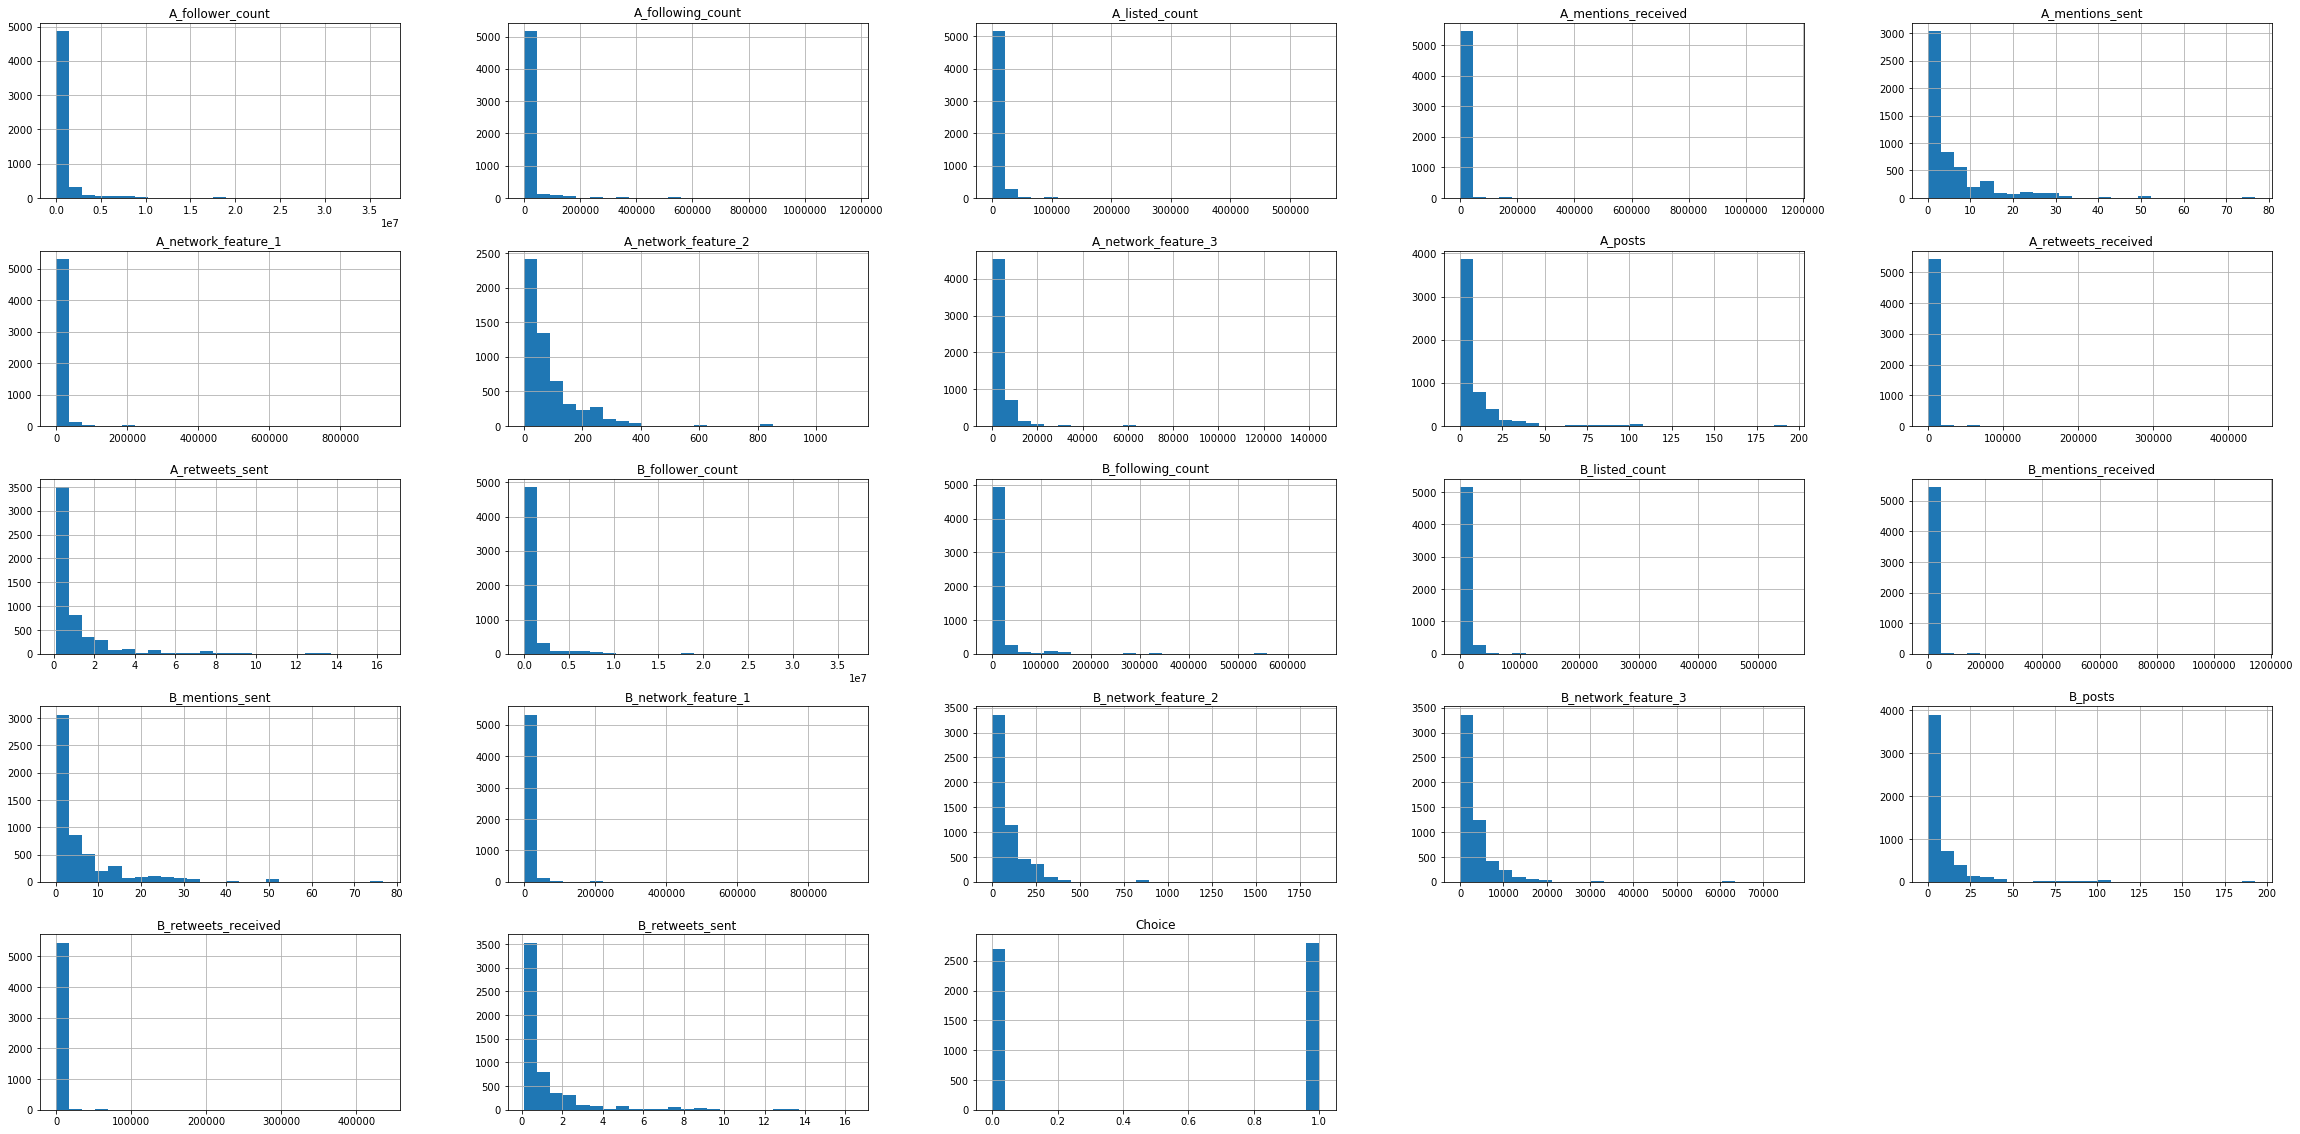

In [94]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
train.hist(bins=25, figsize=(40,20))
# save_fig("attribute_histogram_plots")
plt.show()

In [95]:
#label '1' means A is more influential than B. 
#label 0 means B is more influential than A.
#if dif label is positive, choice is closer to 1
#if dif label is negative, choice is closer to 0

#This function transforms the data and finds the differences between the relevant columns
def data_transform(x):
    x['dif_follower_count'] = x['A_follower_count']-x['B_follower_count']
    x['dif_following_count'] = x['A_following_count']-x['B_following_count']
    x['dif_listed_count'] = x['A_listed_count']-x['B_listed_count']
    x['dif_mentions_received'] = x['A_mentions_received']-x['B_mentions_received']
    x['dif_retweets_received'] = x['A_retweets_received']-x['B_retweets_received']
    x['dif_mentions_sent'] = x['A_mentions_sent']-x['B_mentions_sent']
    x['dif_retweets_sent'] = x['A_retweets_sent']-x['B_retweets_sent']
    x['dif_posts'] = x['A_posts']-x['B_posts']
    x['dif_network_feature_1'] = x['A_network_feature_1']-x['B_network_feature_1']
    x['dif_network_feature_2'] = x['A_network_feature_2']-x['B_network_feature_2']
    x['dif_network_feature_3'] = x['A_network_feature_3']-x['B_network_feature_3']
    x = x.drop('A_follower_count',1).drop('B_follower_count',1)
    x = x.drop('A_following_count',1).drop('B_following_count',1)
    x = x.drop('A_listed_count',1).drop('B_listed_count',1)
    x = x.drop('A_mentions_received',1).drop('B_mentions_received',1)
    x = x.drop('A_retweets_received',1).drop('B_retweets_received',1)
    x = x.drop('A_mentions_sent',1).drop('B_mentions_sent',1)
    x = x.drop('A_retweets_sent',1).drop('B_retweets_sent',1)
    x = x.drop('A_posts',1).drop('B_posts',1)
    x = x.drop('A_network_feature_1',1).drop('B_network_feature_1',1)
    x = x.drop('A_network_feature_2',1).drop('B_network_feature_2',1)
    x = x.drop('A_network_feature_3',1).drop('B_network_feature_3',1)
    #x = x.drop('dif_network_feature_1',1).drop('dif_mentions_received',1)
    return x

In [96]:
y =train[['Choice']]
x = train.drop('Choice', 1)
x = data_transform(x)
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)
y_test = y_test.Choice
y_train = y_train.Choice
#find the difference for the prediction
#dif_final_test = run_calcs(final_test)


In [97]:
from sklearn.metrics import confusion_matrix
def evaluate_model(model,is_scaled = False):
    if not is_scaled:
        confuse = confusion_matrix(y_test,model.predict(X_test))
    else:
        confuse = confusion_matrix(y_test,model.predict(X_test_scaled))
    print(confuse)
    num_correct = confuse[0][0] + confuse[1][1]
    num_incorrect = confuse[1][0] + confuse[0][1]
    print num_correct
    print num_incorrect
    return "Accuracy: " + str(float(num_correct)/ float(num_correct + num_incorrect))
    

In [98]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train,y_train)
evaluate_model(forest)

[[690 206]
 [253 666]]
1356
459


'Accuracy: 0.747107438017'

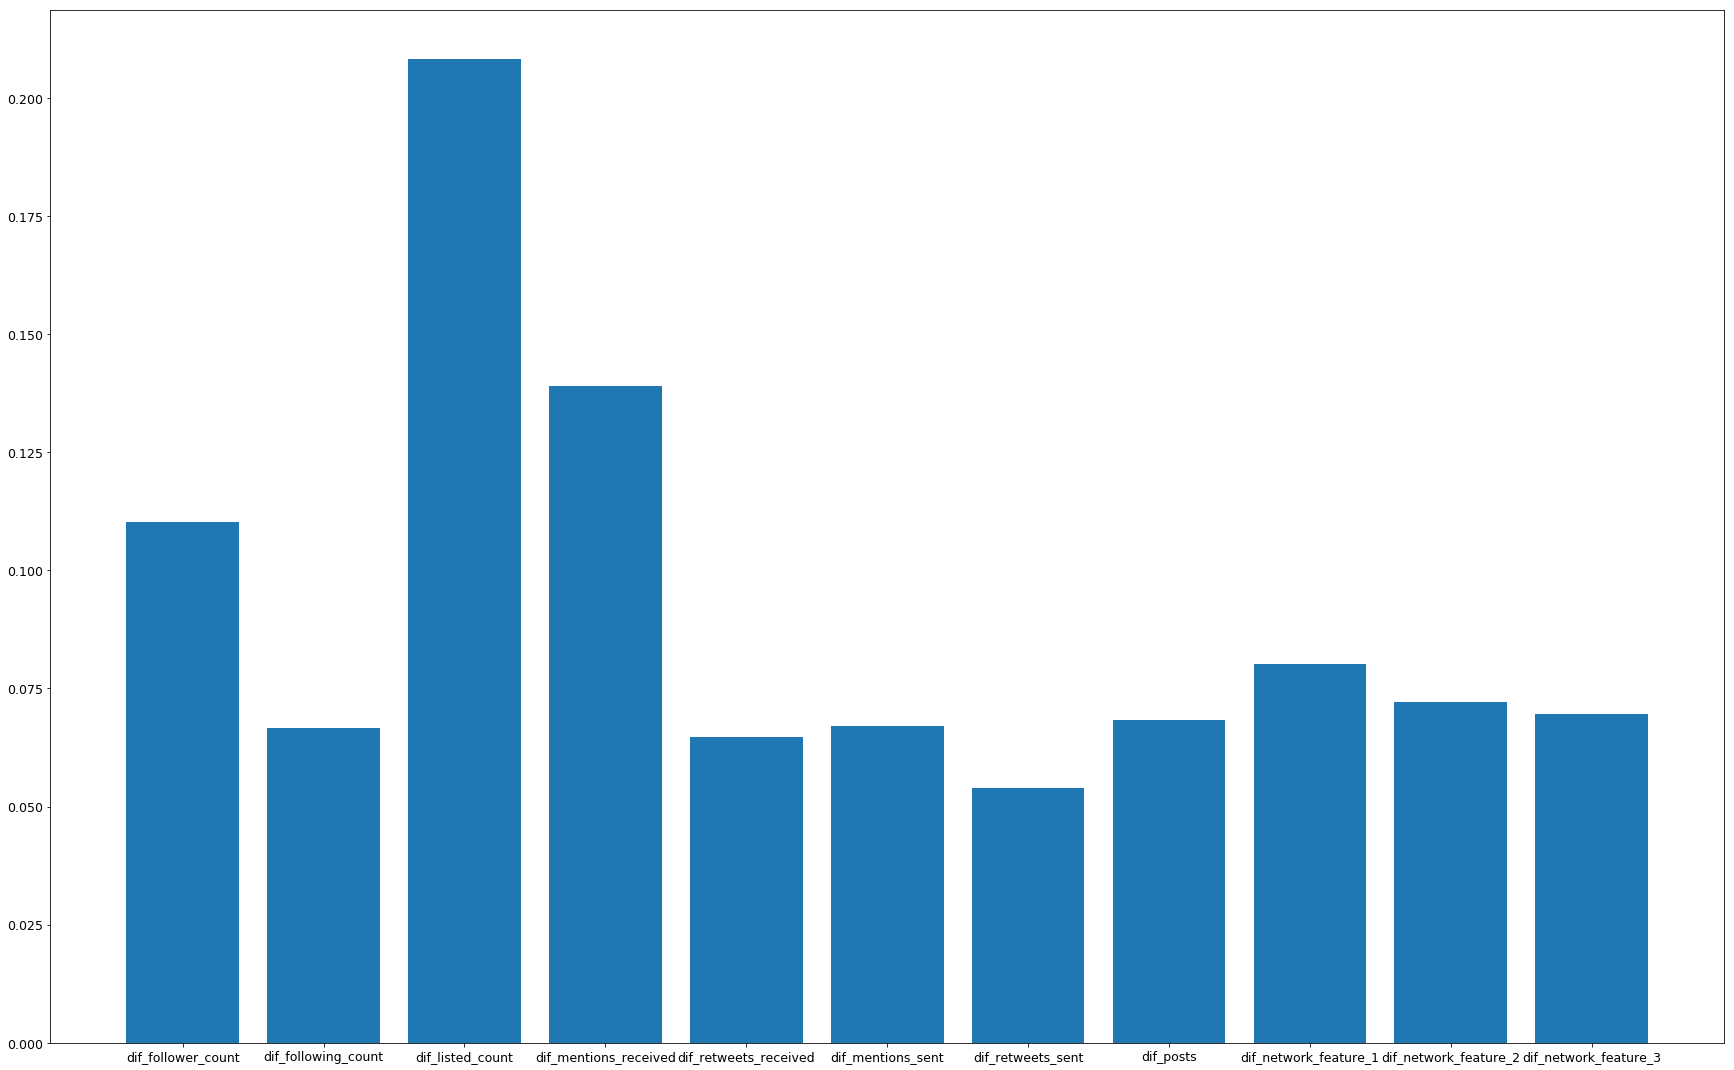

In [99]:
def plot_variable_significances(model):
    var_sig = model.feature_importances_
    plt.figure(figsize = (30,19))
    plt.bar(range(len(X_train.columns)),var_sig,
    tick_label = X_train.columns)
    plt.tick_params(axis = 'both',labelsize = 12.5)
    plt.show()
plot_variable_significances(forest)

[[657 239]
 [245 674]]
1331
484
Accuracy: 0.733333333333
11
11


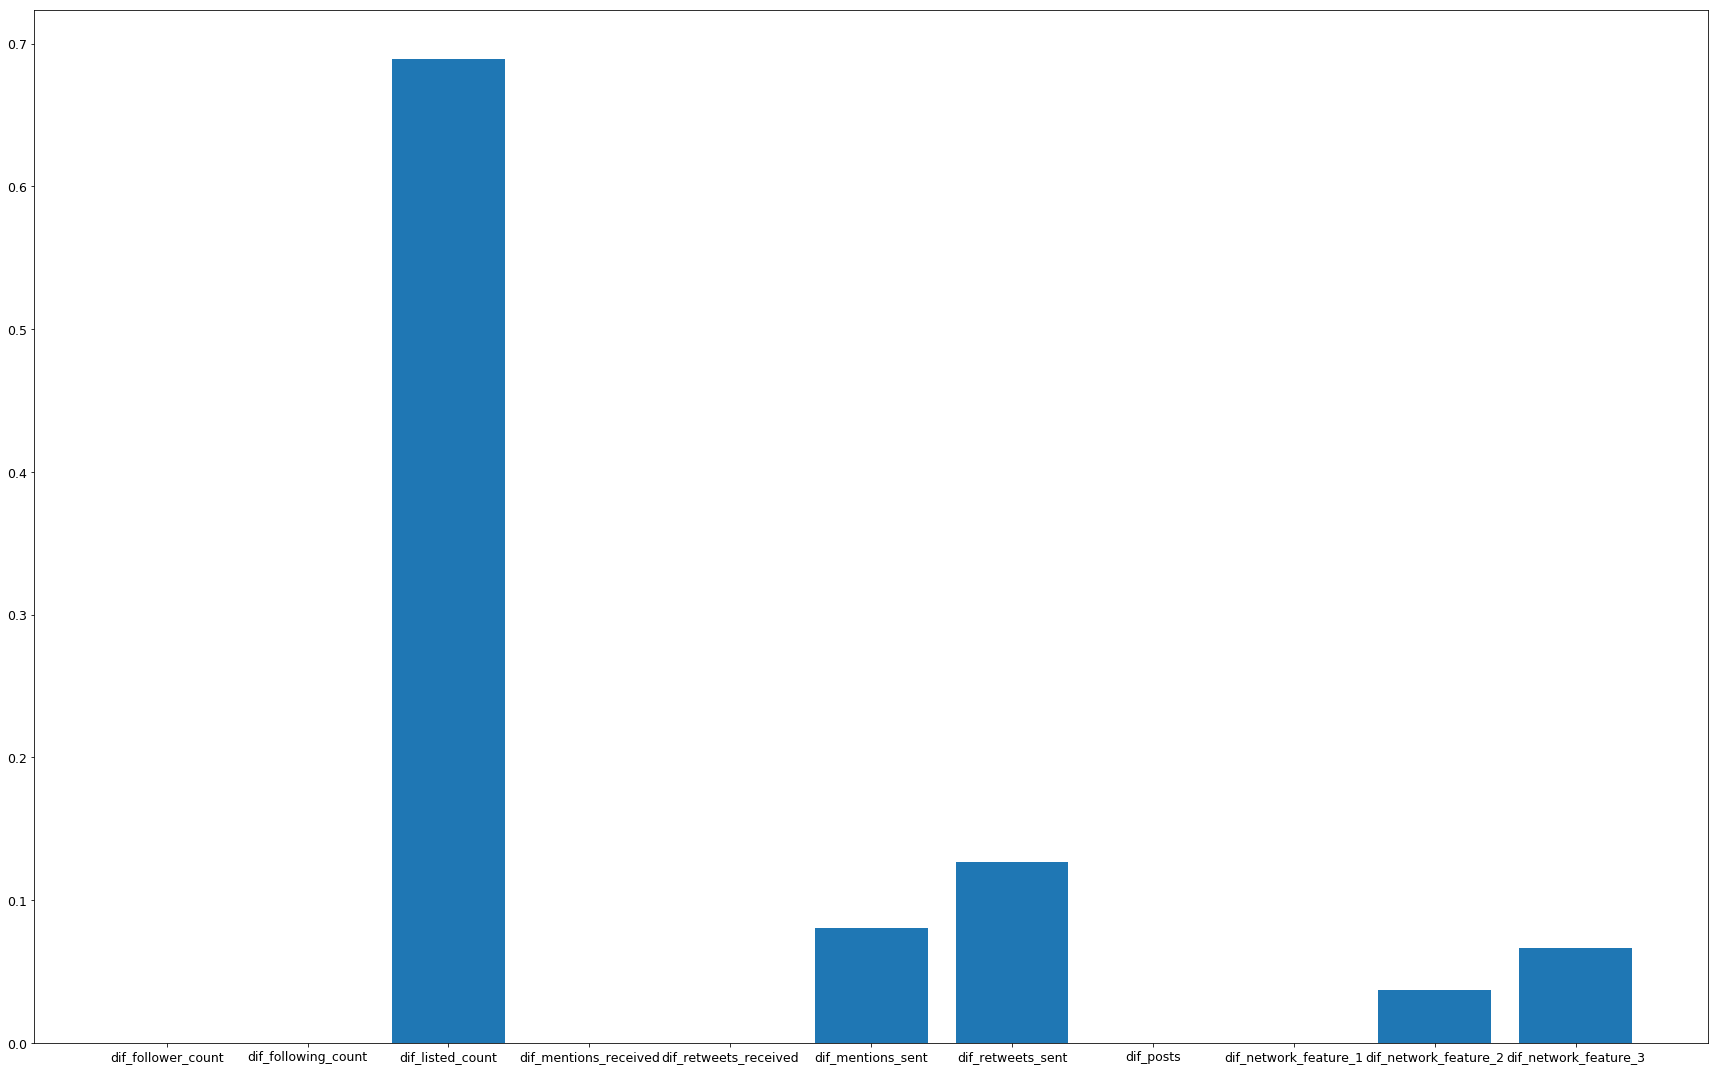

In [100]:
from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
scal.fit(X_train)
X_train_scaled = scal.transform(X_train)
X_test_scaled = scal.transform(X_test)
logistic_l1 = linear_model.LogisticRegression(penalty = 'l1', C = .01)
logistic_l1.fit(X_train_scaled,y_train)
print(evaluate_model(logistic_l1,is_scaled = True))
print(len(X_train.columns))
print(len(list(logistic_l1.coef_[0])))
logisticAttributes = pd.DataFrame({'Feature':list(X_train.columns),'Significance':list(np.abs(logistic_l1.coef_[0]))})
logisticAttributes.Significance =logisticAttributes.Significance.map(lambda x: x/sum(logisticAttributes.Significance)) 
plt.figure(figsize = (30,19))
plt.bar(range(len(X_train.columns)),logisticAttributes.Significance,tick_label = X_train.columns)
plt.tick_params(axis = 'both',labelsize = 12.5)
plt.show()

In [106]:
from sklearn.svm import LinearSVC
clf = LinearSVC(penalty = 'l1',C = .01,dual = False)
clf.fit(X_train_scaled, np.array(y_train))
evaluate_model(clf,is_scaled = True)

[[633 263]
 [239 680]]
1313
502


'Accuracy: 0.723415977961'

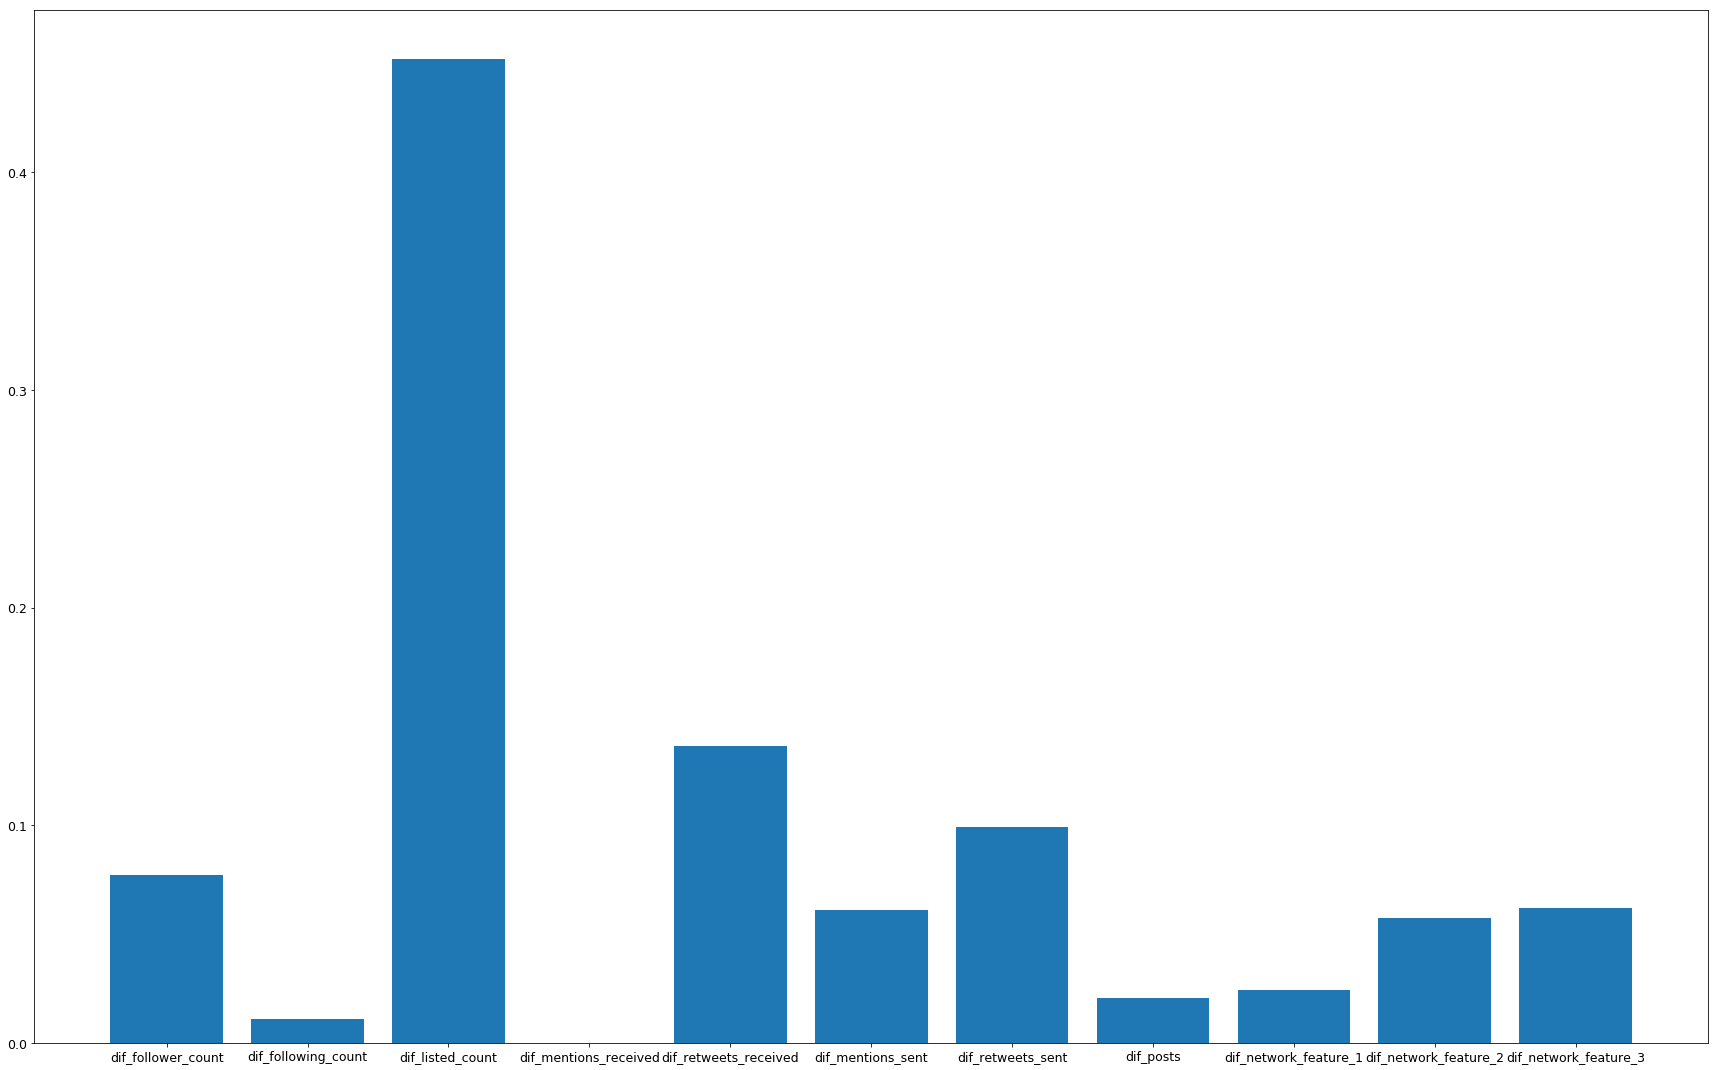

In [107]:
svmImportance = pd.DataFrame({'Feature':list(X_train.columns),'Importance':list(np.abs(clf.coef_[0]))})
svmImportance.Importance=svmImportance.Importance.map(lambda x: x/ sum(svmImportance.Importance)) 
plt.figure(figsize = (30,19))
plt.bar(range(len(X_train.columns)),svmImportance.Importance,tick_label = X_train.columns)
plt.tick_params(axis = 'both',labelsize = 12.5)
plt.show()

In [108]:
best_model_accuracy = 0.747107438017
profit_margin = 10
influencer_follower_buy_prob = .05
influencer_tweet_twice_buy_prob = .075
cost_other_all = 5
percent_of_times_influencer_selected = .5
dollars_per_conversion_no_analytics = 10 /( (influencer_follower_buy_prob) * percent_of_times_influencer_selected)
dollars_per_conversion_analytics = 10/ (best_model_accuracy * influencer_tweet_twice_buy_prob)
print("Expected Cost per Conversion without Analytics: $" + str(dollars_per_conversion_no_analytics) + "0")
print("Expected Cost per Conversion with Analytics: $" + str(round(dollars_per_conversion_analytics,1)) + "0")
print("Total Cost Reduction with analytics: $" + str(round(dollars_per_conversion_no_analytics - dollars_per_conversion_analytics,2)))

Expected Cost per Conversion without Analytics: $400.00
Expected Cost per Conversion with Analytics: $178.50
Total Cost Reduction with analytics: $221.53


# Best Model

After a few iterations, our best model was the Random Forest Model. This resulted in an accuracy of 74.7%. It was suprising to us that this non-parametric on a relatively small data set performed so well. 

# Best Predictors
All of the models we used (Random Forest, LASSO Logistic Regression, and Support Vector Machines) unanimously returned the most important predictor: `diff_listed_count`. This predictor can be interpreted as the difference between Twitter User A and Twitter User B's number of apperances in public lists. This is reasonable because if Qser A is in a public list, it implies that some user took the time to classify User A's content as worth while. Both SVM and Random Forest models also pointed to `diff_retweets_recieved` as being important. This is also reasonable for obvious reasons. 
# Surprises Business

What surprised us was that `diff_follower_count` was relatively unimportant for all the models. This is counter intuitive because, to the lay person, popularity is measured by followers. However, followers do not necessarily correlate to influence. We suspect this is because even if a user has a high follower count, they may have a low follower engagement. An influencer necessarily needs to have an engaged and active follower community.

# Business Uses
The main value of this model is from a cost control angle. By focusing on key distributed influencers rather than high profile celebrities (those with high followers), a company can have a more targeted marketing strategy. This would allow for a greater penetration into certain social networks niches rather than a one size fits all approach.